In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
x = df.iloc[:,3:].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# No other preprocessing is required. 

# Feature scaling is important for CLustering.

# Building K-Means Cluster

In [6]:
from sklearn.cluster import KMeans

In [10]:
wcss = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i,random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [11]:
wcss

[181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30566.45113025186,
 25005.55037243283,
 21996.523372372307,
 19746.911957660894,
 17602.19046838677,
 15926.627039985106,
 14631.802353268315,
 12793.951692914929]

In [13]:
abc = [1,2,3,4,5,6,7,8,9,10,11,12,13]

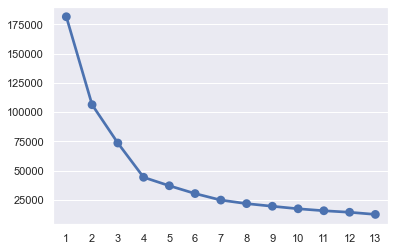

In [15]:
sns.pointplot(abc,wcss)
plt.show()

In [ ]:
# We can say elbow is = 4.

In [35]:
kmeans = KMeans(n_clusters=5,random_state=1)
kmeans.fit(x)
y_pred = kmeans.fit_predict(x)

In [36]:
y_pred

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [37]:
actual_data=pd.concat([df,pd.DataFrame(y_pred)],axis=1)
actual_data.head(1)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,4


In [38]:
actual_data.rename(columns = {0:'Cluster'},inplace=True)
actual_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


# Visualization

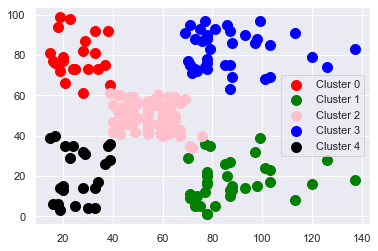

In [66]:
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],s=100,c='red',label='Cluster 0')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],s=100,c='green',label='Cluster 1')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],s=100,c='pink',label='Cluster 2')
plt.scatter(x[y_pred==3,0],x[y_pred==3,1],s=100,c='blue',label='Cluster 3')
plt.scatter(x[y_pred==4,0],x[y_pred==4,1],s=100,c='black',label='Cluster 4')
plt.legend()
plt.show()

In [67]:
actual_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


<AxesSubplot:xlabel='Age', ylabel='Cluster'>

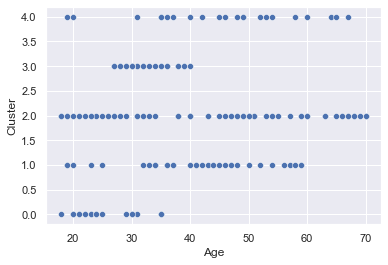

In [68]:
sns.scatterplot(actual_data['Age'],actual_data['Cluster'])

<AxesSubplot:xlabel='Gender'>

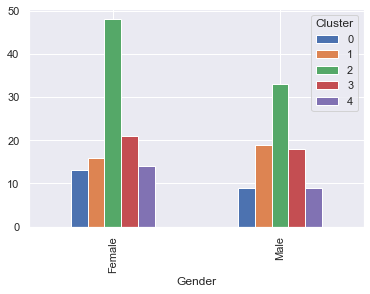

In [69]:
pd.crosstab(actual_data['Gender'],actual_data['Cluster']).plot(kind='bar')

# Recommendations:

1. Cluster 1 have lower salary but have very high spending score. So there credit limit can be increaded. 
2. Cluster 5 have lowere salary and don't spend much. 
3. Cluster 2 and 4 have very high salary. CLuster 4 and 2 can be given more lucrative offers to keep shopping.
4. Cluster 3 can also be given some offers. They might spend. 

##### According to age:
1. We can see people with less age, having lesser salary, have great spending score. 
2. With age, people spending score is becoming less. Cluster 3...which has great spending score are also of young age.

##### According to gender:
1. When compared to male, female in young age, having lesser salary are have good spending score. 
2. When we analyse cluster 1...where salary is great but spending score is less....more male are there in this category. 
3. Cluster 3 and 4 both have more female population.

In [46]:
mall_report = actual_data.to_csv('mall_report.html')

Import to csv file. Which can be sent to the needful people. 

# Done